# Simple Linear Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Advertising.csv")

In [3]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
df['total_spend'] = df['TV'] + df['radio'] + df['newspaper']

In [5]:
df.head()

,TV,radio,newspaper,sales,total_spend
0,230.1,37.8,69.2,22.1,337.1
1,44.5,39.3,45.1,10.4,128.9
2,17.2,45.9,69.3,9.3,132.4
3,151.5,41.3,58.5,18.5,251.3
4,180.8,10.8,58.4,12.9,250.0


<AxesSubplot:xlabel='total_spend', ylabel='sales'>

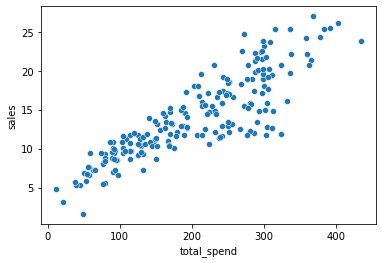

In [6]:
sns.scatterplot(data=df, x='total_spend', y='sales')

## OLS with numpy

In [8]:
X = df['total_spend']
y = df['sales']

In [9]:
p, res, _, _, _= np.polyfit(X,y,deg=1, full = True)

In [10]:
p

array([0.04868788, 4.24302822])

In [11]:
res

array([1338.44397617])

In [12]:
potential_spend = np.linspace(0,500,100)

In [13]:
predicted_sales = 0.04868788 * potential_spend + 4.24302822

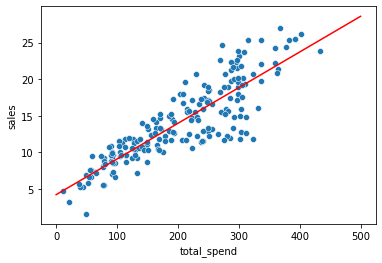

In [14]:
sns.scatterplot(data=df, x='total_spend', y='sales')
plt.plot(potential_spend,predicted_sales, color='red')

# Polynomial fit

In [15]:
p, res, _, _, _ = np.polyfit(X,y,deg=3, full = True)

In [16]:
p

array([ 3.07615033e-07, -1.89392449e-04,  8.20886302e-02,  2.70495053e+00])

In [17]:
res

array([1317.47033906])

In [18]:
pred_sales = 3.07615033e-07 * potential_spend**3 + -1.89392449e-04 * potential_spend**2 + 8.20886302e-02 * potential_spend + 2.70495053e+00

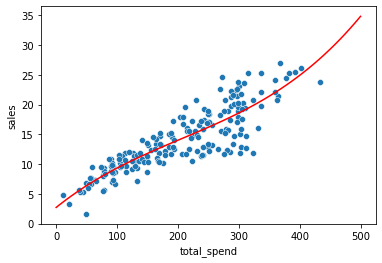

In [19]:
sns.scatterplot(data=df, x='total_spend', y='sales')
plt.plot(potential_spend,pred_sales, color='red')

# Statsmodel

In [20]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.metrics import r2_score

In [21]:
result_linear = smf.ols('sales ~ total_spend', data=df).fit()
print(result_linear.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     603.4
Date:                Thu, 06 Jan 2022   Prob (F-statistic):           5.06e-62
Time:                        03:23:31   Log-Likelihood:                -473.88
No. Observations:                 200   AIC:                             951.8
Df Residuals:                     198   BIC:                             958.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       4.2430      0.439      9.676      